In [1]:
import numpy as npp
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from SimplePolicyNetwork import SimplePolicyNetwork
from SimpleRLPolicyGradientSolver import SimpleRLPolicyGradientSolver
from simpleBox import simpleBox
from SimRat import SimRat
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

VirtualRat2-0


simpleBox.py:222: RuntimeWarning: invalid value encountered in double_scalars
  right_accuracy = np.sum(history[right,-1]>0).astype(float) / np.sum(right)
simpleBox.py:221: RuntimeWarning: invalid value encountered in double_scalars
  left_accuracy = np.sum(history[left,-1]>0).astype(float) / np.sum(left)


Episode 50 complete (0.17s), loss: 219.940879057, reward: 42, running reward: 36.9295897373
Episode 100 complete (0.17s), loss: 46.4068204768, reward: 46, running reward: 47.171749343


simpleBox.py:228: RuntimeWarning: invalid value encountered in double_scalars
  p = left_accuracy / (left_accuracy + right_accuracy)


Episode 50 complete (0.29s), loss: 1762.6832193, reward: 4, running reward: 6.01686484506
Episode 100 complete (0.25s), loss: 1735.12887952, reward: 4, running reward: 3.94820104755
Episode 150 complete (0.17s), loss: 1676.71017771, reward: -12, running reward: 1.07694659186
Episode 200 complete (0.18s), loss: 1650.18470894, reward: 4, running reward: 4.45435150071
Episode 250 complete (0.20s), loss: 1472.98749035, reward: 16, running reward: 9.0906164766
Episode 300 complete (0.19s), loss: 1081.01538044, reward: 30, running reward: 19.4572682393
Episode 350 complete (0.17s), loss: 851.650423872, reward: 24, running reward: 25.5142977864
Episode 400 complete (0.17s), loss: 294.352081035, reward: 44, running reward: 36.6966279246
Episode 450 complete (0.17s), loss: 124.511826946, reward: 42, running reward: 44.5937493581
Episode 500 complete (0.20s), loss: 73.2138821549, reward: 50, running reward: 46.8685218378
Rat SimRat has pro block accuracy 0.962861318428, anti block accuracy 0.974

/usr/local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode 50 complete (0.21s), loss: 585.371442948, reward: 36, running reward: 23.2198603958
Episode 100 complete (0.18s), loss: 147.649990296, reward: 44, running reward: 43.6341689556
Episode 50 complete (0.17s), loss: 1905.55728942, reward: 0, running reward: 1.43593115052
Episode 100 complete (0.18s), loss: 1655.55269937, reward: 0, running reward: 2.90510209662
Episode 150 complete (0.17s), loss: 2040.23726531, reward: -4, running reward: 5.33322443306
Episode 200 complete (0.18s), loss: 1575.94949638, reward: 18, running reward: 8.48524638297
Episode 250 complete (0.21s), loss: 1709.71763835, reward: 2, running reward: 6.81509223744
Episode 300 complete (0.22s), loss: 1675.507135, reward: 8, running reward: 8.19630608529
Episode 350 complete (0.19s), loss: 1176.27132116, reward: 20, running reward: 15.8029132349
Episode 400 complete (0.19s), loss: 1077.69185627, reward: 26, running reward: 24.3151727705
Episode 450 complete (0.19s), loss: 399.324170174, reward: 36, running reward:

dataProcessFunctions.py:473: RuntimeWarning: Mean of empty slice
  anti_mean = np.nanmean(anti_matrix, axis = 0)


Episode 50 complete (0.20s), loss: 128.360059342, reward: 40, running reward: 40.7758938927
Episode 100 complete (0.20s), loss: 47.1080117994, reward: 48, running reward: 48.055507609
Episode 50 complete (0.21s), loss: 1818.24588542, reward: 6, running reward: 6.69133087614
Episode 100 complete (0.21s), loss: 1303.31524893, reward: 20, running reward: 13.4125042488
Episode 150 complete (0.18s), loss: 1477.77180312, reward: 14, running reward: 19.7563695735
Episode 200 complete (0.19s), loss: 481.881435602, reward: 40, running reward: 29.7584440297
Episode 250 complete (0.19s), loss: 228.905792498, reward: 48, running reward: 41.1354147686
Episode 300 complete (0.18s), loss: 79.4192819354, reward: 46, running reward: 45.9319336867
Episode 350 complete (0.23s), loss: 50.0644733118, reward: 48, running reward: 47.7058560119
Episode 400 complete (0.17s), loss: 35.6320773374, reward: 48, running reward: 48.6849312416
Episode 450 complete (0.20s), loss: 27.1970155368, reward: 48, running rew

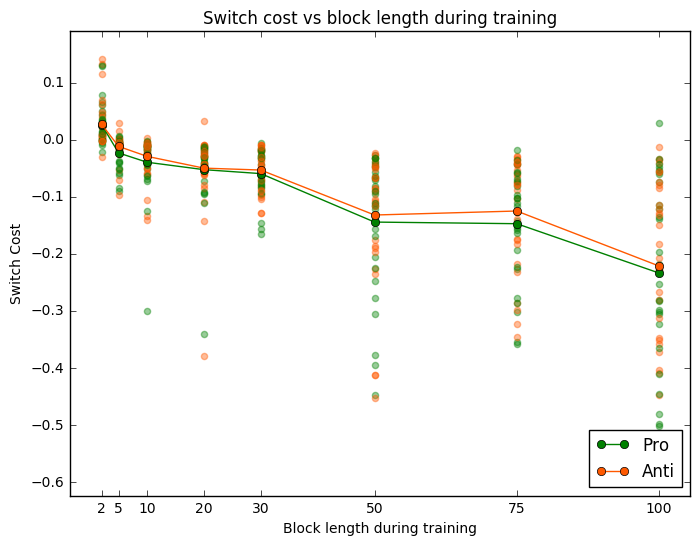

In [2]:
box = simpleBox(mode="alternative",length=1000,block_size=30,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y
all_solvers = []
all_rats = []
block_lengths = np.array([2,5,10,20,30,50,75,100])
#loaded_params = load_weights("good_weights/good_weights3.pkl")
for i in range(block_lengths.shape[0]):
    solvers = {}
    rats = {}
    block_length = block_lengths[i]
    for j in range(30):
        ratname = 'VirtualRat'+str(block_length)+"-"+str(j)
        print ratname
        model = SimplePolicyNetwork(hidden_dim=10,reg=0, noise_factor = 0, temperature = 1)
        rat = SimRat(model)
        box = simpleBox(mode="no_rule",length=10000,block_size=block_length,random_range=0,
                        trial_per_episode=50, repeat = False, reward_ratio = 1, p2a = 0.5, 
                        block_correction = True, left_right_correction = True)
        solver = SimpleRLPolicyGradientSolver(model, box,
                                            update_rule='adam',
                                            optim_config={
                                                'learning_rate': 1e-2,
                                                'decay_rate': 1
                                            },
                                            init_rule='xavier',
                                            num_episodes=101,
                                            verbose=False,
                                            supervised = True,
                                            stop = False,
                                            print_every=50)
        
        solver.init()
        #solver.load_params(loaded_params)
        #solver.set_temperature(5.0)
        solver.train()
        
        box.change_mode("alternative")
        solver.change_settings(num_episodes = 501)
        solver.train()

        rats[ratname] = rat

        probs = rat.predict(val_X,val_y)
        trial_window = 3
        report_accuracy(rat)
        #draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)
        #draw_3d_new(rat.p2a_left_prob, rat.p2a_right_prob, rat.a2p_left_prob, rat.a2p_right_prob, trial_window = 3)

        solvers[ratname] = solver
        rat.addHistory(box.output_history())
        rat.computeLearningCurve()
        #parallel_coordinate(model.activation_history.asnumpy(),rat, start = 0, end = 1000, mode = "average")

    trial_window = 3
    p2a_mean, a2p_mean, p2a_left_mean, a2p_left_mean, p2a_right_mean, a2p_right_mean, \
    num_include, num_exclude = meanPerformance(rats, trial_window = 3)
    #draw_3d(p2a_mean, a2p_mean, trial_window = 3)
    #draw_3d_new(rat.p2a_left_prob, rat.p2a_right_prob, rat.a2p_left_prob, rat.a2p_right_prob, trial_window = 3)
    pro_mean, anti_mean = meanLearningCurve(rats)
    #learningCurve(pro_mean,anti_mean, rats)
    all_solvers.append(solvers)
    all_rats.append(rats)
    
switch_cost_vs_block_length(all_rats, block_lengths, exclude = False)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


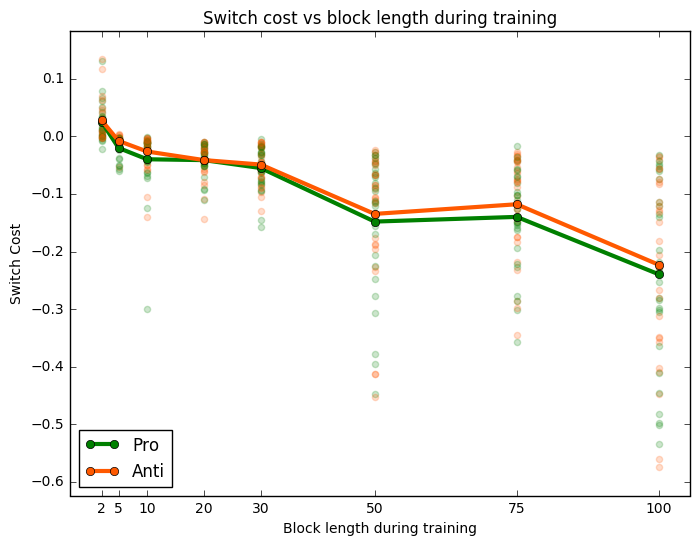

In [15]:
switch_cost_vs_block_length(all_rats, block_lengths, exclude = True)